This notebook shows how you can use Hamilton in a notebook for interactive development. The code is similar to the content of `run.py`.

[Tips on Hamilton + notebooks in the docs](https://hamilton.dagworks.io/en/latest/how-tos/use-in-jupyter-notebook/)

# Imports

In [1]:
from IPython.display import display
from hamilton import driver
from hamilton.io.materialization import to
from hamilton.plugins import matplotlib_extensions 
from mock_api import DataGeneratorResource

import dataflow  # dataflow definition

# Create Driver

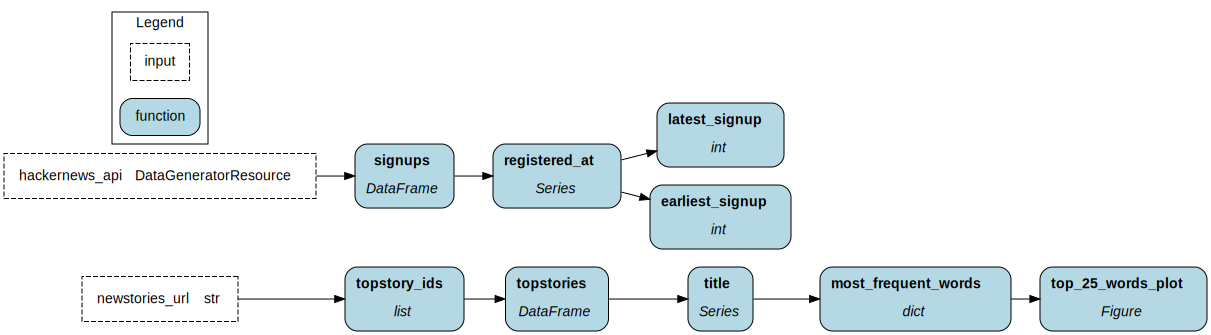

In [2]:
dr = driver.Builder().with_modules(dataflow).build()
dr.display_all_functions()

# Define inputs and requested nodes

Note that we use a list of node names to query and the `Driver.execute()` method instead of defining materializers for `Driver.materialize()`

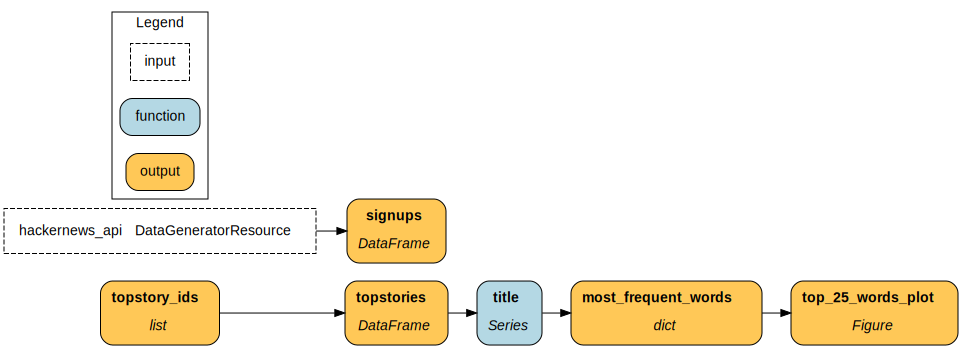

In [3]:
inputs = dict(
    hackernews_api=DataGeneratorResource(num_days=30),
)

requested_nodes = [
    "topstory_ids",
    "most_frequent_words",
    "topstories",
    "signups",
    "top_25_words_plot",
]

dr.visualize_execution(requested_nodes, inputs=inputs)

# Execute

dict_keys(['topstory_ids', 'most_frequent_words', 'topstories', 'signups', 'top_25_words_plot'])

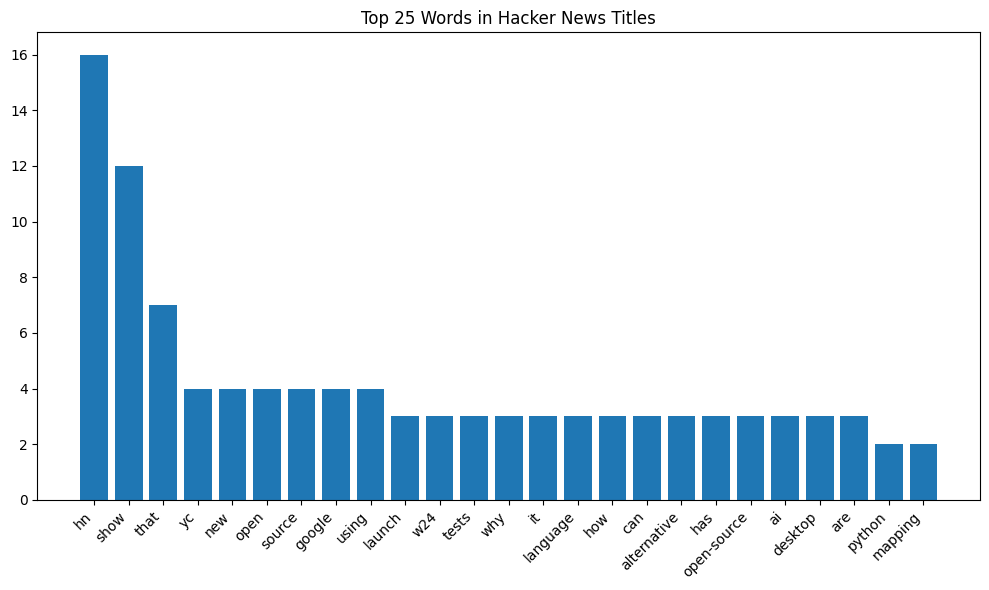

,by,descendants,id,kids,score,time,title,type,url,text
0,rbanffy,9.0,39793044,"[39793204, 39793227, 39793158, 39793184]",38,1711129553,Boom Announces Successful Flight of XB-1 Demon...,story,https://boomsupersonic.com/flyby/inaugural-fir...,NaN
1,samuelbrashears,42.0,39792136,"[39792782, 39792830, 39793117, 39792455, 39792...",55,1711124153,Launch HN: DryMerge (YC W24) – Automate Workfl...,story,NaN,"Hi HN! We&#x27;re Edward and Sam, the founders..."
2,kvptkr,4.0,39791301,"[39793213, 39792211, 39793207]",32,1711119126,Show HN: Leaping – Debug Python tests instantl...,story,https://github.com/leapingio/leaping,Hi HN! We’re Adrien and Kanav. We met at our p...
3,ubutler,62.0,39788322,"[39788517, 39788951, 39792921, 39791935, 39791...",284,1711094018,"Show HN: Mapping almost every law, regulation ...",story,https://umarbutler.com/mapping-almost-every-la...,"Hey HN,<p>After months of hard work, I am exci..."
4,Brajeshwar,45.0,39792383,"[39792852, 39792593, 39792528, 39793071, 39792...",76,1711125603,2K earthquakes in 1 day off Canada coast,story,https://www.livescience.com/planet-earth/earth...,NaN


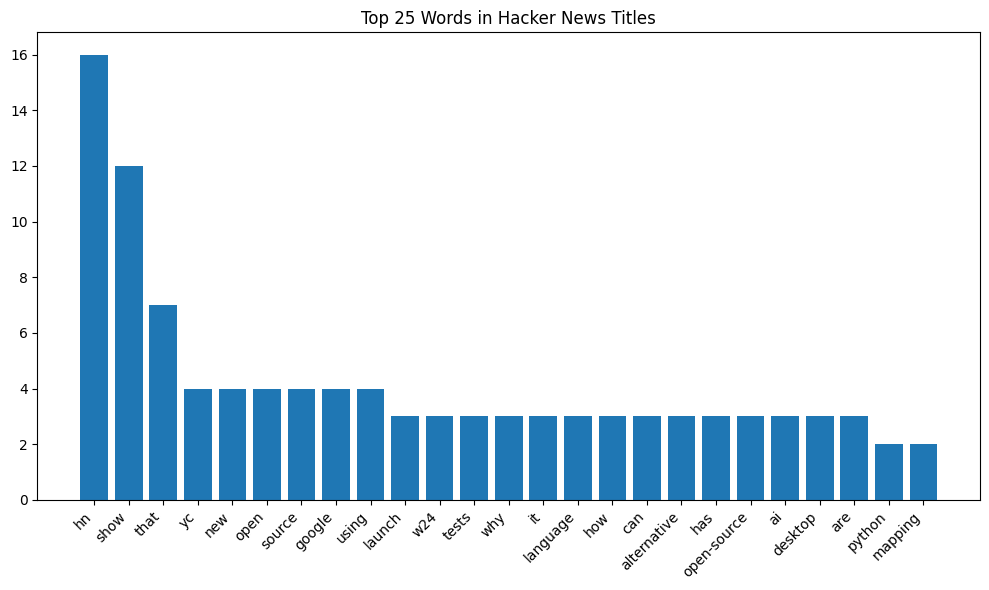

In [4]:
results = dr.execute(requested_nodes, inputs=inputs)

display(
    results.keys(),
    results["top_25_words_plot"],
    results["topstories"].head(),
)